In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import plotly.express as px
from datetime import datetime
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss, adfuller

from pandas_datareader import data

import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [111]:
start_date = '2010-11-21'
end_date = '2020-11-21'

df = data.DataReader('GooG', 'yahoo', start_date, end_date)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-22,295.611969,290.286926,292.638123,294.506134,4389592.0,294.506134
2010-11-23,293.405243,288.020416,292.408966,290.416443,4341412.0,290.416443
2010-11-24,297.186066,292.428894,292.558411,296.374115,4810765.0,296.374115
2010-11-26,295.382843,292.403992,294.127533,293.898407,2632029.0,293.898407
2010-11-29,293.798767,288.892151,293.484955,289.968140,5740838.0,289.968140
...,...,...,...,...,...,...
2020-11-16,1799.069946,1767.689941,1771.699951,1781.380005,1246800.0,1781.380005
2020-11-17,1785.000000,1767.000000,1776.939941,1770.150024,1147100.0,1770.150024
2020-11-18,1773.469971,1746.140015,1765.229980,1746.780029,1173500.0,1746.780029


<AxesSubplot:xlabel='Date'>

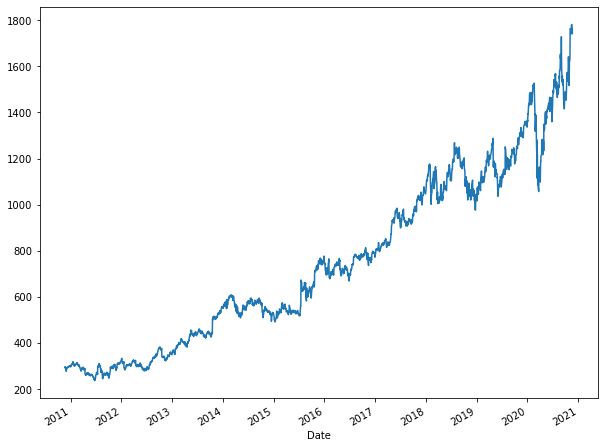

In [112]:
df['Close'].plot()

In [113]:
result = adfuller(df['Close'])

print(f'Test Statistics: {result[0]}')
print()
print(f'p-value: {result[1]}')
print()
print(f'Critical Values: {result[4]}')

if result[1] > 0.05:
    print('Series is not Stationary')
else:
    print('Series is stationary')

Test Statistics: 0.8799813275776553

p-value: 0.9928234363554097

Critical Values: {'1%': -3.4329789374204935, '5%': -2.8627014485379787, '10%': -2.5673882843825098}
Series is not Stationary


In [114]:
## To make it stationary. we will use ndiffs() function
## we can use 1st order diff (most of time it will work) 
## 2 order ndiffs(sometimes )
## Now to use 1st order or 2nd order

pm.arima.ndiffs(df['Close'], alpha=0.05, test='kpss', max_d=4)

1

<AxesSubplot:xlabel='Date'>

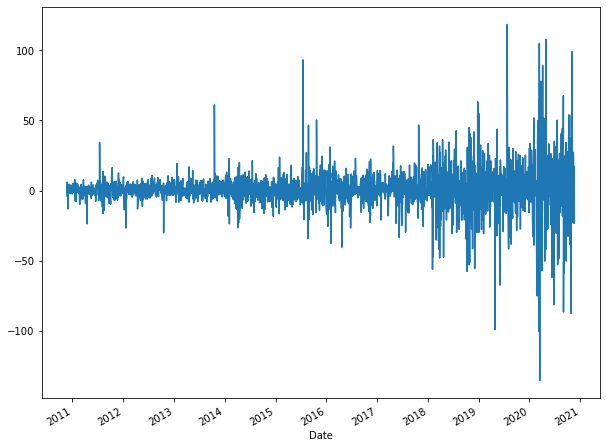

In [115]:
# Result was saying do do 1st order differencing

lag_goog = df['Close'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).dropna()
lag_goog.plot()

In [116]:
## check what diff function to apply
pm.arima.ndiffs(lag_goog, alpha=0.05, test='kpss', max_d=4)

0

In [117]:
# zero result says series is stationary

In [118]:
result = adfuller(lag_goog)

print(f'Test Statistics: {result[0]}')
print()
print(f'p-value: {result[1]}')
print()
print(f'Critical Values: {result[4]}')

if result[1] > 0.05:
    print('Series is not Stationary')
else:
    print('Series is stationary')

Test Statistics: -9.987195057608334

p-value: 2.0406386796020653e-17

Critical Values: {'1%': -3.4329789374204935, '5%': -2.8627014485379787, '10%': -2.5673882843825098}
Series is stationary


# Electricity Data

In [119]:
dfe = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv")
dfe.head(20)

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0000,46.13
1,2012-01-01 01:00:00,4752.1,0.0000,45.89
2,2012-01-01 02:00:00,4542.6,0.0000,45.04
3,2012-01-01 03:00:00,4357.7,0.0000,45.03
4,2012-01-01 04:00:00,4275.5,0.0000,42.61
5,2012-01-01 05:00:00,4274.7,0.0000,39.02
6,2012-01-01 06:00:00,4324.9,0.0000,38.78
7,2012-01-01 07:00:00,4350.0,0.0000,42.74
8,2012-01-01 08:00:00,4480.9,0.0000,38.90
9,2012-01-01 09:00:00,4664.2,0.0000,44.67


In [120]:
# For Statis test we have to fill null value

print("\nMissing values : ",dfe.isnull().sum())


Missing values :  timeStamp      0
demand        81
precip       230
temp         186
dtype: int64


In [121]:
dfe['demand'] = dfe['demand'].fillna(method='ffill')
dfe['temp'] = dfe['temp'].fillna(method='ffill')

In [122]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49205 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49205 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [123]:
dfe['timeStamp'] = pd.to_datetime(dfe['timeStamp'], infer_datetime_format=True)

<AxesSubplot:xlabel='timeStamp'>

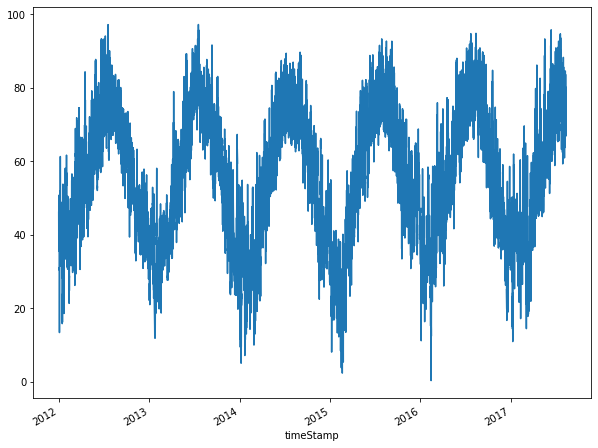

In [124]:
dfe.set_index('timeStamp')['temp'].plot()

In [133]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49205 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49205 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [125]:
stats, p, lags, critical_values = kpss(dfe['temp'])

print(f'Test Statistics: {stats}')
print()
print(f'p-value: {p}')
print()
print(f'Critical Values: {critical_values}')

if p < 0.05:
    print('Series is not Stationary')
else:
    print('Series is stationary')

Test Statistics: 0.987647074929233

p-value: 0.01

Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not Stationary


<AxesSubplot:>

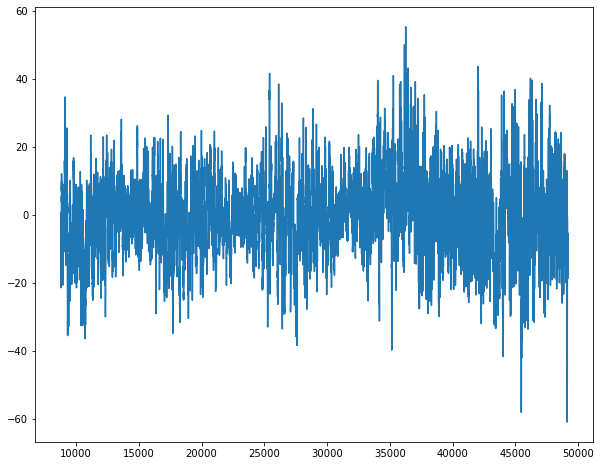

In [126]:
# 8759 - we have 24 datapoints in a day bec it is hourly data.
#       - And 30 days in a month .
#       - And we have 12 months. So (24*30*12=8760)
# so 

lag_temp = dfe['temp'].rolling(window=8760).apply(lambda x: x.iloc[8759] - x.iloc[0]).dropna()
lag_temp.plot()

In [127]:
## As we can see now the seasonality is gone.

In [134]:
stats, p, lags, critical_values = kpss(lag_temp) 
print(f'Test Statistics: {stats}')
print()
print(f'Lags: {lags}')
print()
print(f'p-value: {p}')
print()
print(f'Critical Values: {critical_values}')

if p < 0.05:
    print('Series is not Stationary')
else:
    print('Series is stationary')

Test Statistics: 1.708759384276412

Lags: 54

p-value: 0.01

Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not Stationary


In [129]:
# check what diff function to apply
pm.arima.ndiffs(lag_temp, test='kpss', max_d=4)

1

<AxesSubplot:>

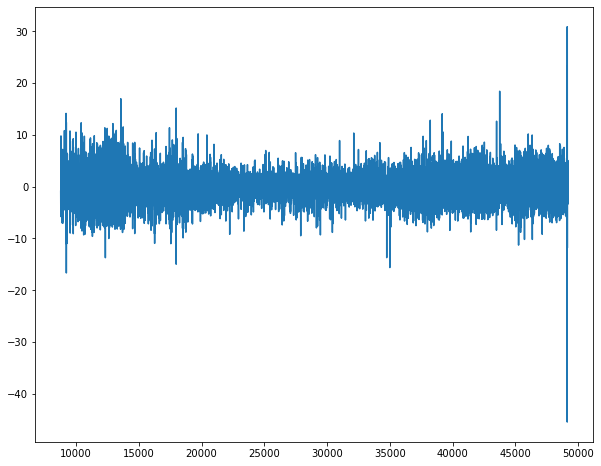

In [136]:
lag_temp.rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).dropna().plot()

In [137]:
lag_temp_diff= lag_temp.rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).dropna()

In [138]:
# As we can see further the varience is reduced.

In [139]:
stats, p, lags, critical_values = kpss(lag_temp_diff) 

print(f'Test Statistics: {stats}')
print()
print(f'Lags: {lags}')
print()
print(f'p-value: {p}')
print()
print(f'Critical Values: {critical_values}')

if p < 0.05:
    print('Series is not Stationary')
else:
    print('Series is stationary')

Test Statistics: 0.0014461900667549436

Lags: 54

p-value: 0.1

Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is stationary
